## CRoss-Industry Standard Process for Data Mining
  The work down here is well structured following the CRISP-DM process.
### 1. Business Understanding
  From the human point of view, there are mainly two groups involved in Airbnb's business, the hosts and the guests. They all care about price. My interesting here is to locate and compare several factors that correlated to price and to answer questions below:
1. When we invest in real estate, we always emphasize location, so how much do loctaion affect rental prices?  
2. We live in an era where it's very easy to get comments from other people, so how much do guest reviews affect rental prices?  
3. If I have money to invest in a home stay facility, should I focus on location or improve the service to get good reviews? The reviews can be improved by host through better service while location can not. The answer to this question can help landlords decide whether to invest in the location or services.

### 2. Data Understanding
  I get dataset of "Seattle Airbnb Open Data" from https://www.kaggle.com/airbnb/seattle/data#listings.csv. It contains 3818 samples with 92 features. Kaggle provides preliminary basic data exploration. I pay attention to the location, reviews and price features. The significance, type, distribution, and missing values of them are understood.
  
### 3. Prepare Data
  Computers can only handle well formed (in the point view of computer) data. We need to deal with data loading, missing values, data tpye exchange, data normalization, categorical variables, etc. It is worth noting that this maybe an iterative process that may run through the work. 
  
### 4. Model Data
  The key to answering the previous business question is design a methord to compare the importance degree of different factor (location and reviews here) on rental prices. Here I asign a resonable number to the degree of importance from a forecasting perspective by two means. The first is the importance attribute returned by "Gradient Boosting methord". The second is use a DNN model to predict rental prices based only on location or reviews. The degree of importance is the accuracy of prediction.  
  
### 5. Results and Deploy
  The results and what decisions should be made based on the results are posted on the web site below. 

## Data Understanding

In [1]:
import pandas as pd
data = pd.read_csv("seattle_listing.csv")
print("The size of dataset is:  ", data.shape)
data = pd.read_csv("seattle_listing.csv")
data.head()

The size of dataset is:   (3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

As you can see from the top, the "street",  "review_scores" are the features we care about and the learning object is "price". Because we only care about the relative importance of location and review, the other features are ignore here.

## Prepare Data

In [3]:
# The subset of intrest"
data_selected = data[['street','latitude','longitude','review_scores_location','review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                      'review_scores_value', 'reviews_per_month','price']]

In [4]:
# 'price' is not number, change it into numerical value. Some price has form 1,000.00, "," should be removed.
data_selected.price = data_selected.price.apply(lambda x: float(x[1:].replace(',', ''))) 
data_selected.price.describe()

D:\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

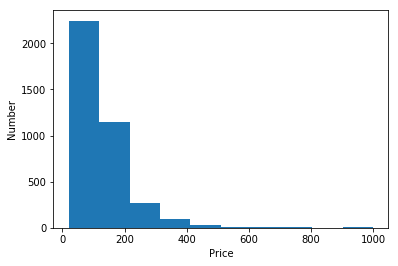

In [5]:
# Most price is less than 150, while the maximum is 1000, there exist outliers.
# Plot the hist to locate outliers.
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data_selected.price)
plt.xlabel('Price')
plt.ylabel('Number')
plt.show()

In [6]:
# drop the rows that has price greater than 600.
data_no_outliers = data_selected[data_selected.price < 600]
data_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3800 entries, 0 to 3817
Data columns (total 12 columns):
street                         3800 non-null object
latitude                       3800 non-null float64
longitude                      3800 non-null float64
review_scores_location         3146 non-null float64
review_scores_rating           3154 non-null float64
review_scores_accuracy         3143 non-null float64
review_scores_cleanliness      3148 non-null float64
review_scores_checkin          3143 non-null float64
review_scores_communication    3150 non-null float64
review_scores_value            3145 non-null float64
reviews_per_month              3174 non-null float64
price                          3800 non-null float64
dtypes: float64(11), object(1)
memory usage: 385.9+ KB


In [7]:
# 'street' is not number, change it into numerical value. 
# I use similarity between address rings to capture the difference between loacation.
import difflib
data_no_outliers.street = data_selected.street.apply(lambda x: difflib.SequenceMatcher(None, data_selected.street[0], x).quick_ratio())
data_no_outliers.street.describe()

D:\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


count    3800.000000
mean        0.768783
std         0.034221
min         0.615385
25%         0.744681
50%         0.775510
75%         0.790698
max         1.000000
Name: street, dtype: float64

In [8]:
# deal with nan.
for index, colum in data_selected.iteritems():
    data_no_outliers[index].fillna(data_no_outliers[index].mean(), inplace = True) 

D:\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [9]:
data_no_outliers.describe()

,street,latitude,longitude,review_scores_location,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,reviews_per_month,price
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000
mean,0.768783,47.628941,-122.333070,9.609027,94.535193,9.635380,9.554638,9.785873,9.809841,9.453736,2.085161,124.977105
std,0.034221,0.043138,0.031783,0.571570,6.000145,0.635889,0.726949,0.542700,0.517423,0.680554,1.667299,78.643412
min,0.615385,47.505088,-122.417219,4.000000,20.000000,2.000000,3.000000,2.000000,2.000000,2.000000,0.020000,20.000000
25%,0.744681,47.609269,-122.354329,9.000000,94.000000,9.635380,9.000000,9.785873,9.809841,9.000000,0.840000,75.000000
50%,0.775510,47.623546,-122.328832,10.000000,95.000000,10.000000,10.000000,10.000000,10.000000,9.453736,2.000000,100.000000
75%,0.790698,47.662918,-122.310731,10.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.662500,150.000000
max,1.000000,47.733358,-122.240607,10.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000,575.000000


In [10]:
#standardization 
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
data_no_outliers = MinMaxScaler.fit_transform(data_no_outliers)
data_no_outliers = pd.DataFrame(data_no_outliers,columns = data_selected.columns)

In [11]:
#prepare total features, loctaion features, review features and target.
data_features = data_no_outliers.iloc[:,0:-1]
data_location = data_no_outliers.iloc[:,0:4]
data_reviews = data_no_outliers.iloc[:,4:11]
data_target = data_no_outliers.price

In [12]:
data_features.head()

,street,latitude,longitude,review_scores_location,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,reviews_per_month
0,1.000000,0.574762,0.261555,0.833333,0.93750,1.000000,1.000000,1.000000,1.00000,1.000000,0.333883
1,0.502128,0.587178,0.291896,1.000000,0.95000,1.000000,1.000000,1.000000,1.00000,1.000000,0.120363
2,0.502128,0.584330,0.271441,0.934838,0.93169,0.954423,0.936377,0.973234,0.97623,0.931717,0.170252
3,0.561798,0.559996,0.253370,0.833333,0.90000,0.875000,0.857143,1.000000,1.00000,0.875000,0.071723
4,0.448485,0.549513,0.289022,1.000000,0.93750,1.000000,1.000000,1.000000,1.00000,1.000000,0.200330


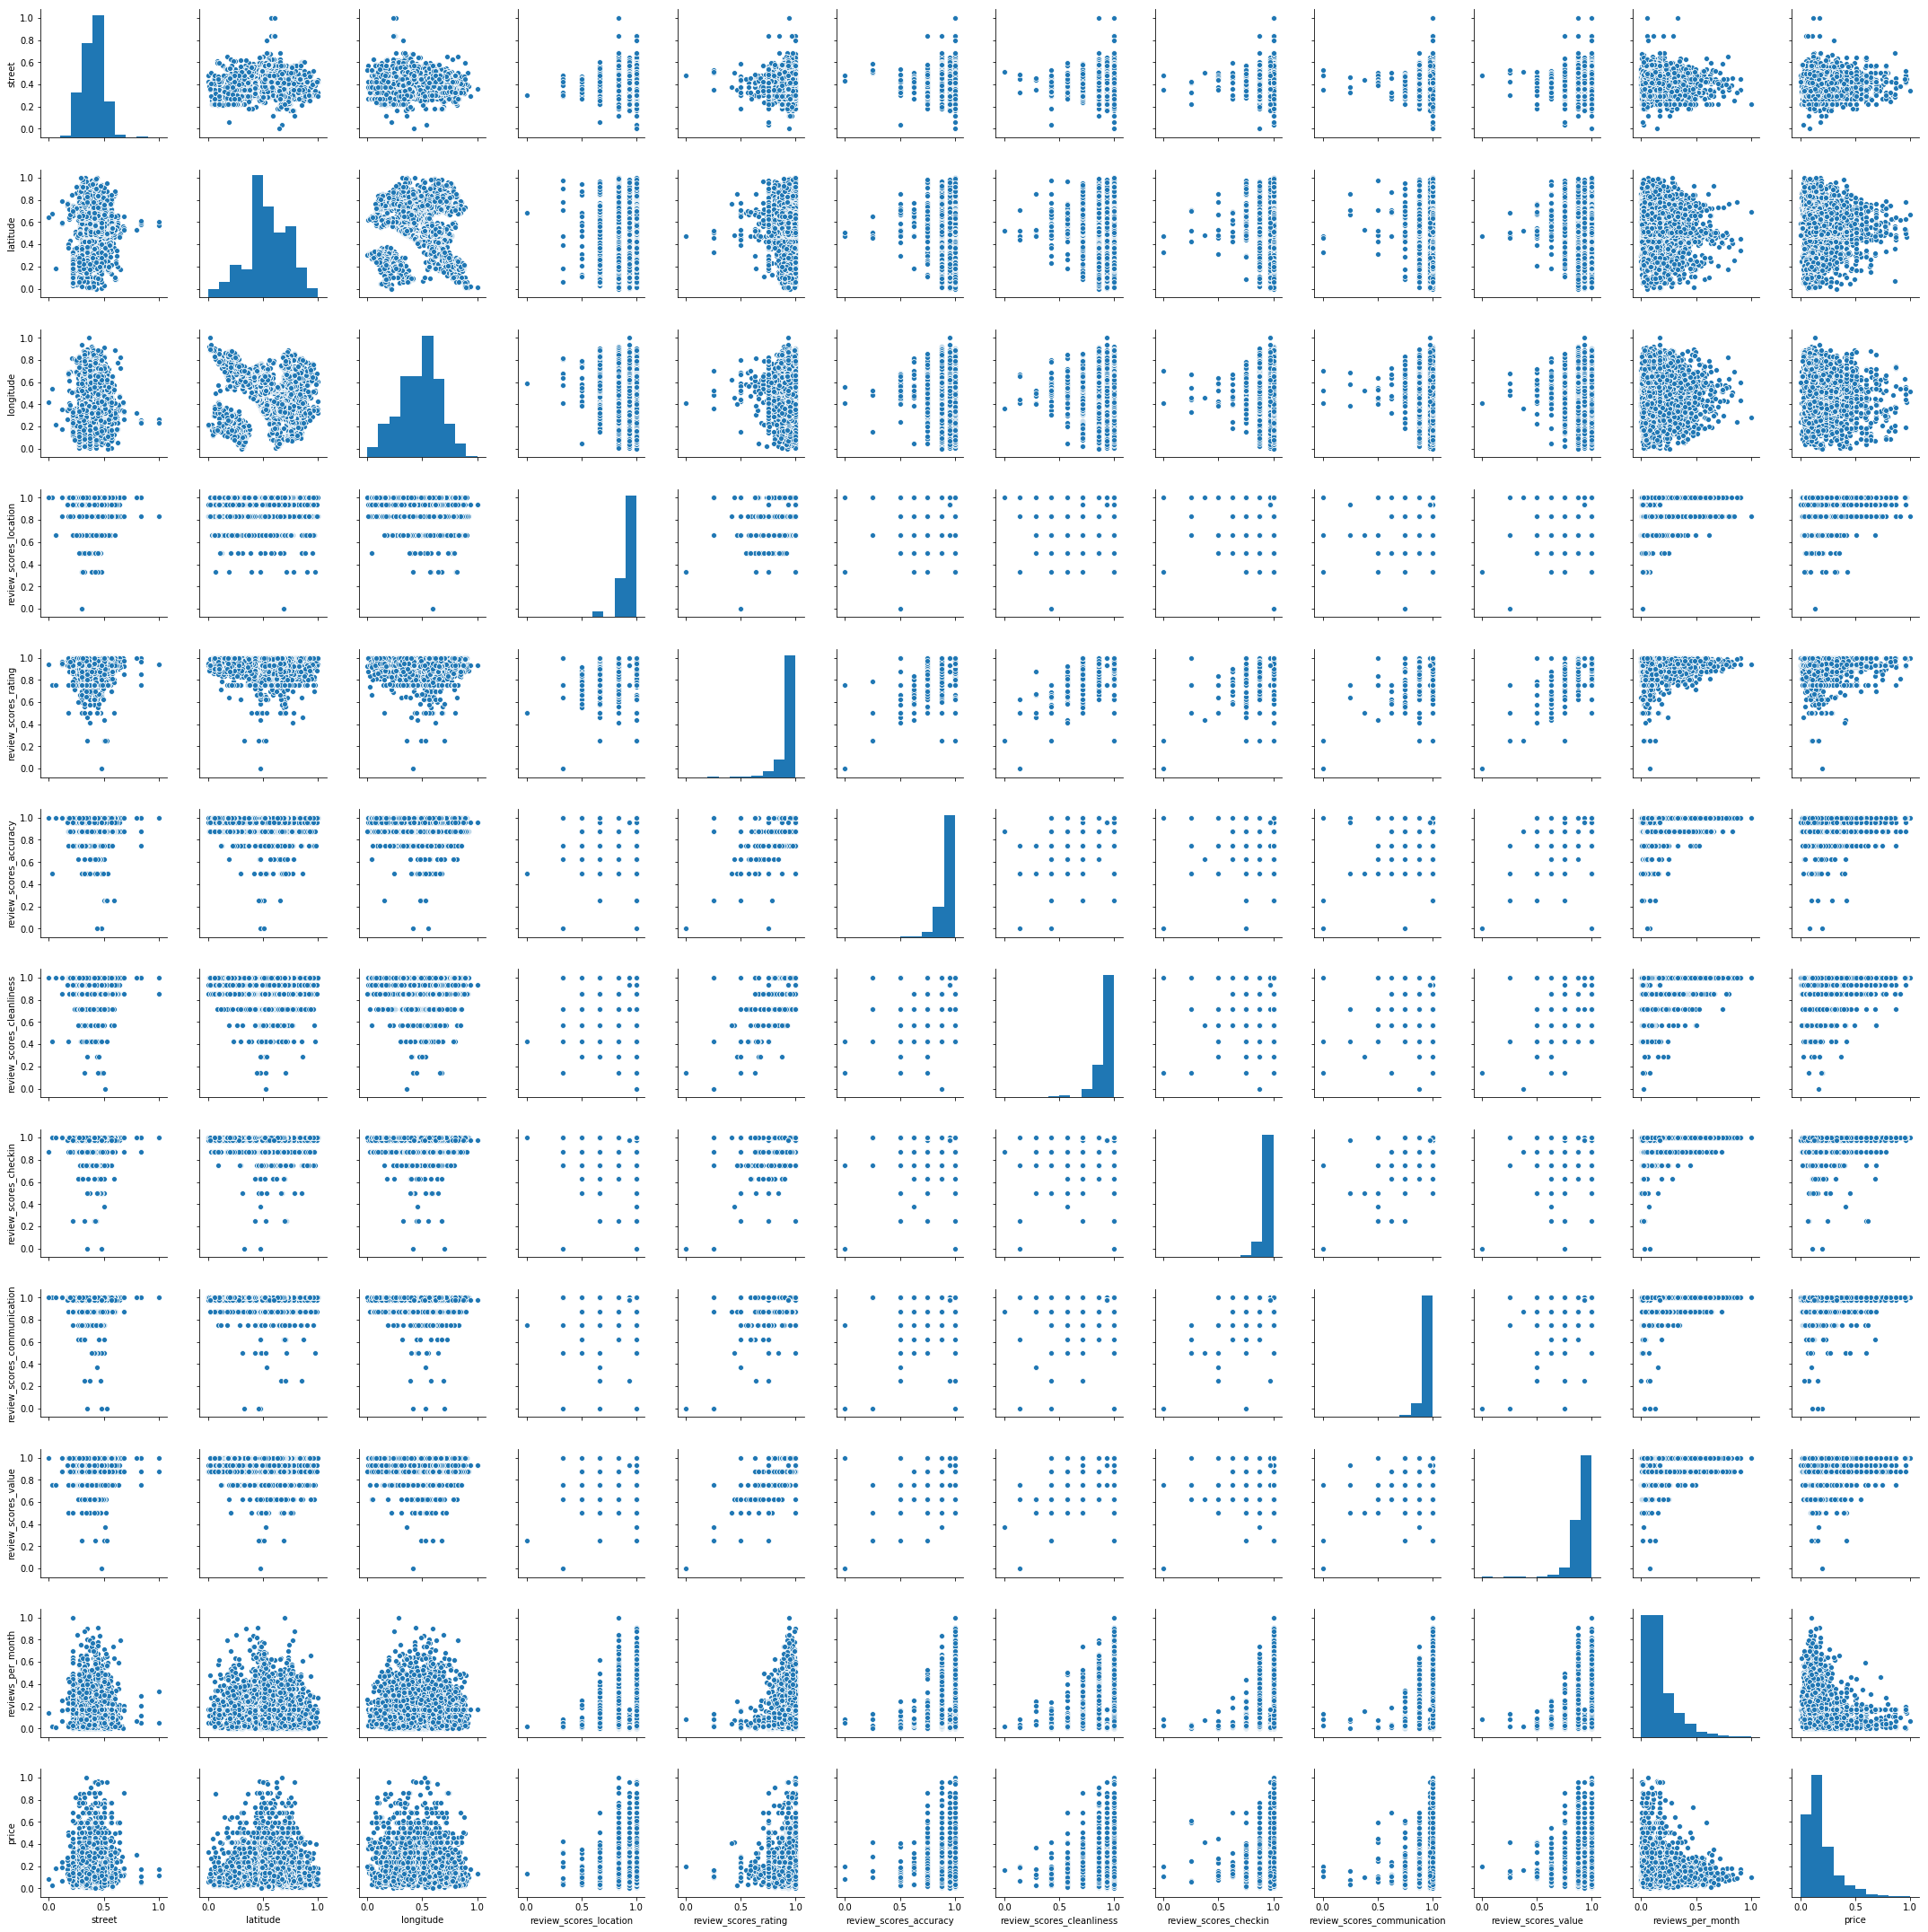

In [14]:
# a galance of the correlation between variables.
import seaborn as sns
sns.pairplot(data_no_outliers)

## Model Data

In [15]:
#split dataset to train and test by 8:2 and a further validation dataset is not needed here for the GridSearchCV doing the work.
from sklearn.model_selection import train_test_split
#datasets for first mode. For GridSearchCV cross vilidation is contained, no need to prepair validation dataset.
x_train, x_test, y_train, y_test = train_test_split(data_features, data_target,test_size=0.2,random_state=666)
#divide training dataset into train and validation dataset by 9:1
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.1, random_state=666)
#Check the sizes of the created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

#datasets for second DNN mode. Prepair a validation dataset to choose model structure.
#split dataset to train and test by 8:2 and a further validation dataset.
x_train_loc, x_test_loc, y_train_loc, y_test_loc = train_test_split(data_location, data_target,test_size=0.2,random_state=666)
x_train_rev, x_test_rev, y_train_rev, y_test_rev = train_test_split(data_reviews, data_target,test_size=0.2,random_state=666)
#divide training dataset into train and validation dataset by 9:1
x_train_loc, x_val_loc, y_train_loc, y_val_loc = train_test_split(x_train_loc, y_train_loc, test_size=0.1, random_state=666)
x_train_rev, x_val_rev, y_train_rev, y_val_rev = train_test_split(x_train_rev, y_train_rev, test_size=0.1, random_state=666)
#Check the sizes of the created datasets
print("Shape of x_train_loc:",x_train_loc.shape)
print("Shape of y_train_loc:",y_train_loc.shape)
print("Shape of x_test_loc:",y_test_rev.shape)
print("Shape of y_test_loc:",y_test_loc.shape)
print("Shape of x_val_loc:",x_val_loc.shape)
print("Shape of y_val_loc:",y_val_loc.shape)
print("Shape of x_train_rev:",x_train_rev.shape)
print("Shape of y_train_rev:",y_train_rev.shape)
print("Shape of x_test_rev:",y_test_rev.shape)
print("Shape of y_test_rev:",y_test_rev.shape)
print("Shape of x_val_rev:",x_val_rev.shape)
print("Shape of y_val_rev:",y_val_rev.shape)


Shape of x_train: (3040, 11)
Shape of x_test: (760, 11)
Shape of y_train: (3040,)
Shape of y_test: (760,)
Shape of x_train_loc: (2736, 4)
Shape of y_train_loc: (2736,)
Shape of x_test_loc: (760,)
Shape of y_test_loc: (760,)
Shape of x_val_loc: (304, 4)
Shape of y_val_loc: (304,)
Shape of x_train_rev: (2736, 7)
Shape of y_train_rev: (2736,)
Shape of x_test_rev: (760,)
Shape of y_test_rev: (760,)
Shape of x_val_rev: (304, 7)
Shape of y_val_rev: (304,)


In [16]:
# first model to get the importance degree by GradientBoostingRegressor.
# Use grid Search to optimize parameters
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.metrics
from sklearn.model_selection import GridSearchCV
# define parameter space
para_space = {'n_estimators': [64, 128, 256, 512],
              'max_depth': [4, 8, 16],
              'min_samples_split': [2, 4],
              'learning_rate': [0.01, 0.02, 0.03]
             }
model_1 = GradientBoostingRegressor(random_state = 666)
grid_search = GridSearchCV(estimator = model_1, param_grid = para_space, n_jobs = 8,
                           cv=6, scoring = 'neg_mean_absolute_error', return_train_score=True)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
result = grid_search.cv_results_
for mean_score, params in zip(result["mean_test_score"], result["params"]):
    print(mean_score, params)
y_predict = grid_search.predict(x_test)
print("predict error on test data: ", sklearn.metrics.mean_absolute_error(y_test, y_predict))

{'learning_rate': 0.01, 'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 512}
-0.09622704217127782 {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 64}
-0.09429612255787888 {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 128}
-0.09323625653308647 {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 256}
-0.09292160126060348 {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 512}
-0.09624916183431839 {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 64}
-0.09435792400930805 {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 128}
-0.09326796798703159 {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 256}
-0.09288237726861442 {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 512}
-0.09513961324667104 {'learning_rate': 0.01, 'max_depth': 8, 'min_sam

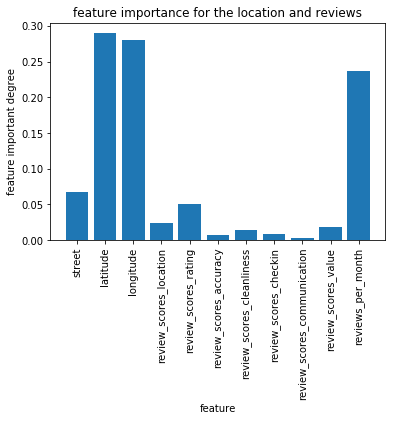

In [17]:
# illustrate feature importance
feature_important_degree = grid_search.best_estimator_.feature_importances_
plt.bar(list(data_features.columns), height=feature_important_degree)
plt.xticks(rotation=90)
plt.xlabel('feature')
plt.ylabel('feature important degree')
plt.title('feature importance for the location and reviews')
plt.show()

In [43]:
# second model with location input.
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
#model architecture
model_loc = Sequential()
model_loc.add(Dense(4, input_dim=4, kernel_initializer='normal',
                activation='relu'))
model_loc.add(Dense(1024, kernel_initializer='normal',
                activation='relu'))
model_loc.add(Dense(1024, kernel_initializer='normal',
                activation='relu'))
model_loc.add(Dense(512, kernel_initializer='normal',
                activation='relu'))
model_loc.add(Dense(256, kernel_initializer='normal',
                activation='relu'))
model_loc.add(Dense(128, kernel_initializer='normal',
                activation='relu'))
model_loc.add(Dense(64, kernel_initializer='normal',
                activation='relu'))
model_loc.add(Dense(1, activation = "linear"))
# Compile model
model_loc.compile(loss='mean_squared_error', optimizer='adam',
metrics=['mean_absolute_error'])
#Train the model
model_loc.fit(x_train_loc, y_train_loc, batch_size=64, epochs=10,
              validation_data = (x_val_loc,y_val_loc))
result = model_loc.evaluate(x_test_loc,y_test_loc)
for i in range(len(model_loc.metrics_names)):
    print("Metric ",model_loc.metrics_names[i],":",str(round(result[i],2)))

Train on 2736 samples, validate on 304 samples
Epoch 1/10
2736/2736 [==============================] - 2s 618us/step - loss: 0.0240 - mean_absolute_error: 0.1102 - val_loss: 0.0179 - val_mean_absolute_error: 0.0920
Epoch 2/10
2736/2736 [==============================] - 0s 65us/step - loss: 0.0201 - mean_absolute_error: 0.1014 - val_loss: 0.0180 - val_mean_absolute_error: 0.0967
Epoch 3/10
2736/2736 [==============================] - 0s 62us/step - loss: 0.0201 - mean_absolute_error: 0.1019 - val_loss: 0.0179 - val_mean_absolute_error: 0.0892
Epoch 4/10
2736/2736 [==============================] - 0s 62us/step - loss: 0.0200 - mean_absolute_error: 0.1011 - val_loss: 0.0177 - val_mean_absolute_error: 0.0934
Epoch 5/10
2736/2736 [==============================] - 0s 61us/step - loss: 0.0199 - mean_absolute_error: 0.1013 - val_loss: 0.0180 - val_mean_absolute_error: 0.1005
Epoch 6/10
2736/2736 [==============================] - 0s 59us/step - loss: 0.0200 - mean_absolute_error: 0.1016 - v

In [45]:
# second model with reviews input.
model_rev = Sequential()
model_rev.add(Dense(7, input_dim=7, kernel_initializer='normal',
                activation='relu'))
model_rev.add(Dense(1024, kernel_initializer='normal',
                activation='relu'))
model_rev.add(Dense(1024, kernel_initializer='normal',
                activation='relu'))
model_rev.add(Dense(512, kernel_initializer='normal',
                activation='relu'))
model_rev.add(Dense(256, kernel_initializer='normal',
                activation='relu'))
model_rev.add(Dense(128, kernel_initializer='normal',
                activation='relu'))
model_rev.add(Dense(64, kernel_initializer='normal',
                activation='relu'))
model_rev.add(Dense(1, activation = "linear"))
# Compile model
model_rev.compile(loss='mean_squared_error', optimizer='adam',
metrics=['mean_absolute_error'])
#Train the model
model_rev.fit(x_train_rev, y_train_rev, batch_size=32, epochs=10,
              validation_data = (x_val_rev,y_val_rev))
result = model_rev.evaluate(x_test_rev,y_test_rev)
for i in range(len(model_rev.metrics_names)):
    print("Metric ",model_rev.metrics_names[i],":",str(round(result[i],2)))

Train on 2736 samples, validate on 304 samples
Epoch 1/10
2736/2736 [==============================] - 2s 712us/step - loss: 0.0214 - mean_absolute_error: 0.1045 - val_loss: 0.0177 - val_mean_absolute_error: 0.0951
Epoch 2/10
2736/2736 [==============================] - 0s 124us/step - loss: 0.0203 - mean_absolute_error: 0.1016 - val_loss: 0.0190 - val_mean_absolute_error: 0.1080
Epoch 3/10
2736/2736 [==============================] - 0s 124us/step - loss: 0.0199 - mean_absolute_error: 0.1012 - val_loss: 0.0176 - val_mean_absolute_error: 0.0858
Epoch 4/10
2736/2736 [==============================] - 0s 122us/step - loss: 0.0196 - mean_absolute_error: 0.0989 - val_loss: 0.0170 - val_mean_absolute_error: 0.0886
Epoch 5/10
2736/2736 [==============================] - 0s 118us/step - loss: 0.0195 - mean_absolute_error: 0.0990 - val_loss: 0.0170 - val_mean_absolute_error: 0.0918
Epoch 6/10
2736/2736 [==============================] - 0s 118us/step - loss: 0.0195 - mean_absolute_error: 0.099

### Results and Deploy
From the first model we can see that, latitude and longitude dominate the importance. The reviews per month is also important. From the second model, location and reviews have the similar predictive power. Thus, they both deserve attention. However，above normal characters is more difficult to achive. If we have a sum of money to invest in a home stay, the most convenient way is to choose a good location and run it at a normal level of service.